$$\def\data{ {\bf d}_\rm{obs}}
\def\vec{\bf}
\def\m{ {\bf m}}
\def\map{m_{\nu}}
\def\postcov{ \mathcal{C}_{\text{post}} }
\def\prcov{ \mathcal{C}_{\text{prior}} }
\def\matrix{\bf}
\def\Hmisfit{ \mathcal{H}_{\text{misfit}} }
\def\diag{\operatorname{diag}}
\def\Vr{{\matrix V}_r}
\def\Wr{{\matrix W}_r}
\def\Ir{{\matrix I}_r}
\def\Dr{{\matrix D}_r}
\def\H{{\matrix H} }
$$ 
# Bayesian quantification of parameter uncertainty:
## Estimating the Gaussian approximation of posterior pdf of the coefficient parameter field in an elliptic PDE

In this example we tackle the problem of quantifying the
uncertainty in the solution of an inverse problem governed by an
elliptic PDE via the Bayesian inference framework. 
Hence, we state the inverse problem as a
problem of statistical inference over the space of uncertain
parameters, which are to be inferred from data and a physical
model.  The resulting solution to the statistical inverse problem
is a posterior distribution that assigns to any candidate set of
parameter fields our belief (expressed as a probability) that a
member of this candidate set is the "true" parameter field that
gave rise to the observed data.


### Bayes's Theorem

The posterior probability distribution combines the prior pdf
$\mu_{\text{prior}}(m)$ over the parameter space, which encodes
any knowledge or assumptions about the parameter space that we may
wish to impose before the data are considered, with a likelihood pdf
$\pi_{\text{like}}(\data \; | \; m)$, which explicitly
represents the probability that a given parameter $m$
might give rise to the observed data $\data \in
\mathbb{R}^{n_t}$, namely:

$$
\begin{align}
d \mu_{\text{post}}(m | \data) \propto \pi_{\text{like}}(\data \,|\, m) \, d\mu_{\text{prior}}(m).
\end{align}
$$

Note that infinite-dimensional analog of Bayes's formula requires the use Radon-Nikodym derivatives instead of probability density functions.

### Gaussian prior and noise

#### The prior

We consider a Gaussian prior with mean ${m}_{\rm prior}$ and covariance $\prcov$, $\mu_{\rm prior} \sim \mathcal{N}({m}_{\rm prior}, \prcov)$. The covariance is given by the discretization of the inverse of differential operator $\mathcal{A}^{-2} = (-\gamma \Delta + \delta I)^{-2}$, where $\gamma$, $\delta > 0$ control the correlation length and the variance of the prior operator. This choice of prior ensures that it is a trace-class operator, guaranteeing bounded pointwise variance and a well-posed infinite-dimensional Bayesian inverse problem.

#### The likelihood

$$
\data =  {\bf f}(m) + {\bf e }, \;\;\;  {\bf e} \sim \mathcal{N}({\bf 0}, {\bf \Gamma}_{\text{noise}} )
$$

$$
\pi_{\text like}(\data \; | \; m)  = \exp \left( - \tfrac{1}{2} \parallel {\bf f}(m) - \data \parallel^{2}_{{\bf \Gamma}_{\text{noise}}^{-1}}\right)
$$

Here ${\bf f}$ is the parameter-to-observable map that takes a parameter $m$ and maps
it to the space observation vector $\data$.

In this application, ${\bf f}$ is a PDE solve to compute the state $u$, which is treated as the observation vector $\data$.

#### The posterior

$$
d\mu_{\text{post}}(m \; | \; \data)  \propto \exp \left( - \tfrac{1}{2} \parallel {\bf f}(m) - \data \parallel^{2}_{{\bf \Gamma}_{\text{noise}}^{-1}} \! - \tfrac{1}{2}\parallel m - m_{\rm prior} \parallel^{2}_{\prcov^{-1}} \right)
$$

### The Laplace approximation to the posterior: $\nu \sim \mathcal{N}({\map},\bf \postcov)$

The mean of the Laplace approximation posterior distribution, ${\map}$, is the
parameter maximizing the posterior, and
is known as the maximum a posteriori (MAP) point.  It can be found
by minimizing the negative log of the posterior, which amounts to
solving a deterministic inverse problem) with appropriately weighted norms,

$$
\map := \underset{m}{\arg \min} \; \mathcal{J}(m) \;:=\;
\Big( 
\frac{1}{2} \| {\bf f}(m) - \data \|^2_{ {\bf \Gamma}_{\text{noise}}^{-1}} 
+\frac{1}{2} \| m -m_{\rm prior} \|^2_{\prcov^{-1}} 
\Big).
$$

The posterior covariance matrix is then given by the inverse of
the Hessian matrix of $\mathcal{J}$ at $\map$, namely

$$
\postcov = \left(\Hmisfit(\map) + \prcov^{-1} \right)^{-1},
$$

provided that $\Hmisfit(\map)$ is positive definite.


#### The generalized eigenvalue problem

$$
\def\matHmis{ {\H}_{\rm misfit}}
\def\Gpost{\boldsymbol{\Gamma}_{\rm post} }
\def\Gprior{ \boldsymbol{\Gamma}_{\rm prior} }
$$

In what follows we denote with $\matHmis, \Gpost, \Gprior \in \mathbb{R}^{n\times n}$ the matrices stemming from the discretization of the operators $\Hmisfit(\map)$, $\postcov$, $\prcov$ with respect to the unweighted Euclidean inner product.
Then we considered the symmetric generalized eigenvalue problem

$$
 \matHmis {\matrix V} = \Gprior^{-1} {\matrix V} {\matrix \Lambda},
$$

where ${\matrix \Lambda} = \diag(\lambda_i) \in \mathbb{R}^{n\times n}$
contains the generalized eigenvalues and the columns of ${\matrix V}\in
\mathbb R^{n\times n}$ the generalized eigenvectors such that 
${\matrix V}^T \Gprior^{-1} {\matrix V} = {\matrix I}$.

#### Randomized eigensolvers to construct the approximate spectral decomposition

When the generalized eigenvalues $\{\lambda_i\}$ decay rapidly, we can
extract a low-rank approximation of $\matHmis$ by retaining only the $r$
largest eigenvalues and corresponding eigenvectors,

$$
 \matHmis \approx \Gprior^{-1} \Vr {\matrix{\Lambda}}_r \Vr^T \Gprior^{-1},
$$

Here, $\Vr \in \mathbb{R}^{n\times r}$ contains only the $r$
generalized eigenvectors of $\matHmis$ that correspond to the $r$ largest eigenvalues,
which are assembled into the diagonal matrix ${\matrix{\Lambda}}_r = \diag
(\lambda_i) \in \mathbb{R}^{r \times r}$.

#### The approximate posterior covariance

Using the Sherman–Morrison–Woodbury formula, we write

$$
\begin{align}
  \notag \Gpost = \left(\matHmis+ \Gprior^{-1}\right)^{-1}
  = \Gprior^{-1}-\Vr {\matrix{D}}_r \Vr^T +
  \mathcal{O}\left(\sum_{i=r+1}^{n} \frac{\lambda_i}{\lambda_i +
    1}\right),
\end{align}
$$

where ${\matrix{D}}_r :=\diag(\lambda_i/(\lambda_i+1)) \in
\mathbb{R}^{r\times r}$. The last term in this expression captures the
error due to truncation in terms of the discarded eigenvalues; this
provides a criterion for truncating the spectrum, namely that $r$ is
chosen such that $\lambda_r$ is small relative to 1. 

Therefore we can approximate the posterior covariance as

$$
\Gpost \approx \Gprior - \Vr {\matrix{D}}_r \Vr^T
$$

#### Drawing samples from a Gaussian distribution with covariance $\Gpost$

Let ${\bf x}$ be a sample for the prior distribution, i.e. ${\bf x} \sim \mathcal{N}({\bf 0}, \Gprior)$, then, using the low rank approximation of the posterior covariance, we compute a sample ${\bf v} \sim \mathcal{N}({\bf 0}, \Gpost)$ as

$$
  {\bf v} = \big\{ \Vr \big[ ({\matrix{\Lambda}}_r +
    \Ir)^{-1/2} - \Ir \big] \Vr^T\Gprior^{-1}  + {\bf I} \big\} {\bf x} 
$$

## This tutorial shows:

- Description of the inverse problem (the forward problem, the prior, and the misfit functional)
- Convergence of the inexact Newton-CG algorithm
- Low-rank-based approximation of the posterior covariance (built on a low-rank
approximation of the Hessian of the data misfit) 
- How to construct the low-rank approximation of the Hessian of the data misfit
- How to apply the inverse and square-root inverse Hessian to a vector efficiently
- Samples from the Gaussian approximation of the posterior

## Goals:

By the end of this notebook, you should be able to:

- Understand the Bayesian inverse framework
- Visualise and understand the results
- Modify the problem and code

## Mathematical tools used:

- Finite element method
- Derivation of gradiant and Hessian via the adjoint method
- inexact Newton-CG
- Armijo line search
- Bayes' formula
- randomized eigensolvers

## List of software used:

- <a href="http://fenicsproject.org/">FEniCS</a>, a parallel finite element element library for the discretization of partial differential equations
- <a href="http://www.mcs.anl.gov/petsc/">PETSc</a>, for scalable and efficient library of linear algebra operations and solvers
- <a href="http://matplotlib.org/">Matplotlib</a>, A great python package that I used for plotting many of the results
- <a href="http://www.numpy.org/">Numpy</a>, A python package for linear algebra.  While extensive, this is mostly used to compute means and sums in this notebook.

## 1. Load modules

In [1]:
from __future__ import absolute_import, division, print_function

import dolfin as dl
import ufl
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from hippylib import *
import sys

sys.path.append("../")
sys.path.append("../utils/")

import plot_vecfun as pf
from misfitUSD import ContinuousStateObservationUSD

import logging
logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)

np.random.seed(seed=1)

## 2. Define the true parameter

This function generates a random field with a prescribed anysotropic covariance function.

In [2]:
mtrue_expression = dl.Expression('std::log(2 + 8*(std::pow(std::pow(x[0]-0.5,2) + std::pow(x[1]-0.5,2),0.5) < 0.2))', \
                                degree = 2)

## 3. Set up the mesh and finite element spaces

We compute a two dimensional mesh of a unit square with nx by ny elements.
We define a P2 finite element space for the *state* and *adjoint* variable and P1 for the *parameter*.

In [3]:
ndim = 2
nx = 32
ny = nx
mesh = dl.UnitSquareMesh(nx, ny)
Vh2 = dl.VectorFunctionSpace(mesh, 'Lagrange', 1)
Vh1 = dl.FunctionSpace(mesh, 'Lagrange', 1)
Vh = [Vh2, Vh1, Vh2]
print( "Number of dofs: STATE={0}, PARAMETER={1}, ADJOINT={2}".format(
    Vh[STATE].dim(), Vh[PARAMETER].dim(), Vh[ADJOINT].dim()) )

Number of dofs: STATE=2178, PARAMETER=1089, ADJOINT=2178


## 4. Set up the forward problem

Let $\Omega$ be the unit square in $\mathbb{R}^2$, and $\Gamma_D$, $\Gamma_N$  be the Dirichlet and Neumann portitions of the boundary $\partial \Omega$ (that is $\Gamma_D \cup \Gamma_N = \partial \Omega$, $\Gamma_D \cap \Gamma_N = \emptyset$). The forward problem reads

$$
\left\{
\begin{array}{ll}
\nabla \cdot \left( e^m {\bf A}\right) = {\bf 0} & \text{in } \Omega\\
{\bf u} = \boldsymbol{0} & \text{on } \Gamma_D, \\
e^m {\bf A} \cdot \boldsymbol{n} = {\bf t} & \text{on } \Gamma_N^1, 
\end{array}
\right.
$$

where $\bf A = 2\left[\nabla \cdot {\bf u}\ {\bf I} + \frac{1}{2}\left(\nabla {\bf u } + \nabla {\bf u}^T \right)\right]$ is a plane stress tensor, ${\bf u} \in \mathcal{V}$ is the state variable, and $m \in \mathcal{M}$ is the uncertain parameter. Here $\Gamma_D$ corresponds to the bottom side of the unit square, and $\Gamma_N$ corresponds to the top, left and right sides.
We also let ${\bf t} = \begin{bmatrix} 0 & -0.1\end{bmatrix}^T$ on the top boundary, and ${\bf t} = {\bf 0}$ on the left and right boundaries.

To set up the forward problem we use the `PDEVariationalProblem` class, which requires the following inputs
- the finite element spaces for the state, parameter, and adjoint variables `Vh`
- the pde in weak form `pde_varf`
- the boundary conditions `bc` for the forward problem and `bc0` for the adjoint and incremental problems.

The `PDEVariationalProblem` class offer the following functionality:
- solving the forward/adjoint and incremental problems
- evaluate first and second partial derivative of the forward problem with respect to the state, parameter, and adojnt variables.

In [4]:
class GammaTop(dl.SubDomain):
    def inside(self, x, on_boundary):
        return dl.near(x[1], 1)
    
def bottom_boundary(x, on_boundary):
    return on_boundary and  x[1] < dl.DOLFIN_EPS

def epsilon(u):
    return ufl.sym(ufl.grad(u))

def A(u):
    return dl.Constant(2.0)*(dl.tr(epsilon(u))*ufl.Identity(d) + epsilon(u))

u_bdr = dl.Constant((0, 0))#dl.Expression("x[1]", degree=1)
u_bdr0 = dl.Constant((0.0, 0.0))
bc = dl.DirichletBC(Vh[STATE], u_bdr, bottom_boundary)
bc0 = dl.DirichletBC(Vh[STATE], u_bdr0, bottom_boundary)

t = dl.Constant((0.0, -0.1))
d = mesh.topology().dim()
mtrue_fun = dl.interpolate(mtrue_expression, Vh[PARAMETER])

top = GammaTop()
marker = dl.MeshFunction("size_t", mesh, d-1)
marker.set_all(0)
top.mark(marker, 1)
dss = dl.Measure("ds", subdomain_data=marker)
    
def pde_varf(u,m,p):
    return ufl.inner(p, t)*dss - ufl.exp(m)*ufl.inner(A(u), ufl.grad(p))*ufl.dx
    
pde = PDEVariationalProblem(Vh, pde_varf, bc, bc0, is_fwd_linear=True)

## 4. Set up the prior

To obtain the synthetic true paramter $m_{\rm true}$ we generate a realization from the prior distribution.

Here we assume a Gaussian prior, $\mu_{\rm prior} \sim \mathcal{N}(0, \prcov)$ with zero mean and covariance matrix $\prcov = \mathcal{A}^{-2}$, where $\mathcal{A}$ is a differential operator of the form

$$ \mathcal{A} = -\gamma \nabla \cdot \left( \Theta\, \nabla \right) + \delta I, $$

equipped with Robin boundary conditions $\nabla m \cdot \boldsymbol{n} + \beta m = 0$, where $\beta \propto \sqrt{\gamma\delta}$.

Here $\Theta = {\bf I}$.

Prior regularization: (delta_x - gamma*Laplacian)^order: delta=1e-05, gamma=0.001, order=2


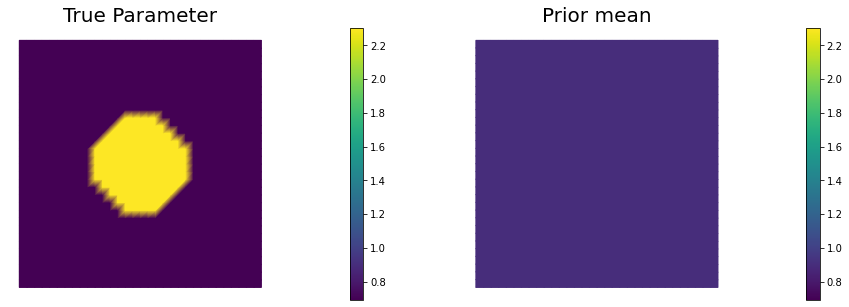

In [5]:
scale_prior = math.sqrt(1e-4)
gamma = 1e-1
delta = 1e-3
gamma *= scale_prior
delta *= scale_prior

prior = BiLaplacianPrior(Vh[PARAMETER], gamma, delta, robin_bc=True)
prior.mean.zero()
area_d = dl.assemble((dl.Constant(0.0)*mtrue_fun + dl.Constant(1.0))*dl.dx)
prior.mean += dl.assemble(mtrue_fun*dl.dx)/area_d
print("Prior regularization: (delta_x - gamma*Laplacian)^order: delta={0}, gamma={1}, order={2}".format(delta, gamma,2))    

mtrue = mtrue_fun.vector()
                   
objs = [dl.Function(Vh[PARAMETER],mtrue), dl.Function(Vh[PARAMETER],prior.mean)]
mytitles = ["True Parameter", "Prior mean"]
nb.multi1_plot(objs, mytitles)
plt.show()

model = Model(pde,prior, misfit)

## 5. Set up the misfit functional and generate synthetic observations

Under the assumption of Gaussian additive noise, the likelihood function $\pi_{\rm like}$ has the form

$$\pi_{\rm like}( \data \,| \, m ) \propto \exp\left( -\frac{1}{2}\|u(m) - \data \|^2_{\Gamma_{\rm noise}^{-1}}\right), $$

where $u(m)$ denotes the solution of the forward model at a given parameter $m$.

The class `ContinuousStateObservationUSD` implements the evaluation of the log-likelihood function and of its partial derivatives w.r.t. the state $u$ and parameter $m$.

To generate the synthetic observation, we first solve the forward problem using the true parameter $m_{\rm true}$. Synthetic observations are obtained by perturbing the components of the state variable with random Gaussian noise.
`rel_noise_x` and `rel_noise_y` are the signal to noise ratio of the `x` and `y` components, respectively.

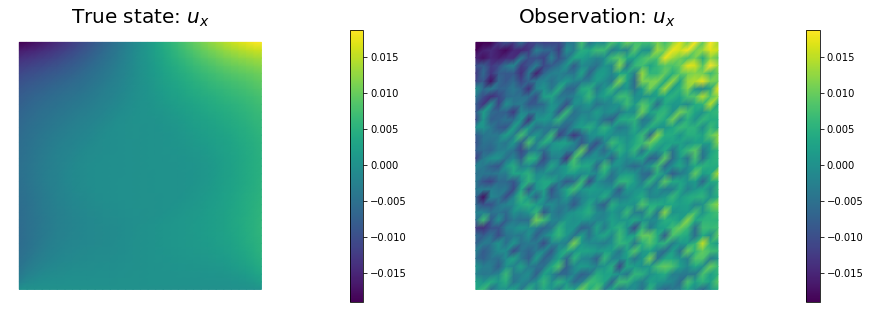

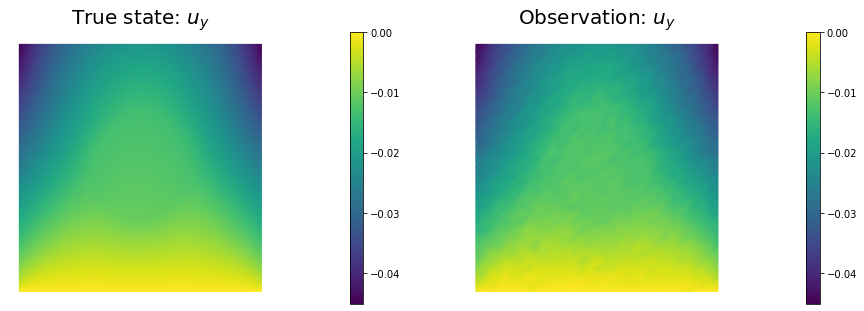

In [6]:
def addanisotropicnoise(V, u, noise_std_dev_x, noise_std_dev_y):
    ux_noise = u.copy()
    uy_noise = u.copy()
    parRandom.normal_perturb(noise_std_dev_x, ux_noise)
    parRandom.normal_perturb(noise_std_dev_y, uy_noise)
    indicator_x = dl.interpolate(dl.Constant((1, 0)), V).vector()
    indicator_y = dl.interpolate(dl.Constant((0, 1)), V).vector()
    u.zero()
    u.axpy(1., indicator_x*ux_noise)
    u.axpy(1., indicator_y*uy_noise)
    return u, indicator_x, indicator_y

utrue = pde.generate_state()
uobs = pde.generate_state()
x = [uobs, mtrue, None]
pde.solveFwd(x[STATE], x)
utrue = dl.Function(Vh[STATE], uobs)
utrue = utrue.copy(deepcopy=True)
rel_noise_x = 0.1
rel_noise_y = 0.01
MAX = uobs.norm("linf")
noise_std_dev_x = rel_noise_x * MAX
noise_std_dev_y = rel_noise_y * MAX
noise_variances = np.array([noise_std_dev_x**2, noise_std_dev_y**2])

misfit = ContinuousStateObservationUSD(Vh[STATE], dl.dx, bc0, noise_variances)
misfit.d, indicator_x, indicator_y = addanisotropicnoise(Vh[STATE], x[STATE], noise_std_dev_x, noise_std_dev_y)

uobs_fun = dl.Function(Vh[STATE], uobs)
vmax = (utrue.vector()*indicator_x).max()
vmin = (utrue.vector()*indicator_x).min()

objs = [utrue, uobs_fun]
mytitles = ["True state: $u_x$", "Observation: $u_x$"]
pf.multi_plot(objs, mytitles, same_colorbar=True, vmin=vmin, vmax=vmax, comp=0)

vmax = (utrue.vector()*indicator_y).max()
vmin = (utrue.vector()*indicator_y).min()

mytitles = ["True state: $u_y$", "Observation: $u_y$"]
pf.multi_plot(objs, mytitles, same_colorbar=True, vmin=vmin, vmax=vmax, comp=1)

plt.show()

## 6. Set up the model and test gradient and Hessian

The model is defined by three component:
- the `PDEVariationalProblem` `pde` which provides methods for the solution of the forward problem, adjoint problem, and incremental forward and adjoint problems.
- the `Prior` `prior` which provides methods to apply the regularization (*precision*) operator to a vector or to apply the prior covariance operator (i.e. to solve linear system with the regularization operator)
- the `Misfit` `misfit` which provides methods to compute the cost functional and its partial derivatives with respect to the state and parameter variables.

To test gradient and the Hessian of the model we use forward finite differences.

(yy, H xx) - (xx, H yy) =  2.954948146933933e-11


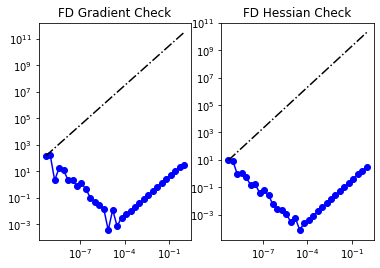

In [7]:
model = Model(pde, prior, misfit)

m0 = dl.interpolate(dl.Expression("sin(x[0])", degree=5), Vh[PARAMETER])
_ = modelVerify(model, m0.vector())

## 7. Compute the MAP point

We used the globalized Newtown-CG method to compute the MAP point.


It  cg_it cost            misfit          reg             (g,dm)          ||g||L2        alpha          tolcg         
  1   1    6.181628e+00    6.181628e+00    2.588396e-10   -8.535732e+00   1.303758e+02   1.000000e+00   5.000000e-01
  2   1    6.174454e+00    6.174454e+00    2.396058e-10   -1.434945e-02   4.411042e+01   1.000000e+00   5.000000e-01
  3   4    1.884517e+00    1.884452e+00    6.525004e-05   -9.215081e+00   4.306447e+01   1.000000e+00   5.000000e-01
  4   1    1.818901e+00    1.818835e+00    6.524994e-05   -1.312339e-01   2.353188e+01   1.000000e+00   4.248444e-01
  5   4    1.639874e+00    1.639809e+00    6.508787e-05   -3.656244e-01   1.609879e+01   1.000000e+00   3.513970e-01
  6   1    1.639643e+00    1.639578e+00    6.508787e-05   -4.624837e-04   1.253773e+01   1.000000e+00   3.101066e-01
  7  10    8.599100e-01    8.597305e-01    1.795082e-04   -1.577894e+00   1.243861e+01   1.000000e+00   3.088783e-01
  8   1    8.126395e-01    8.124600e-01    1.795082e-04   -9.

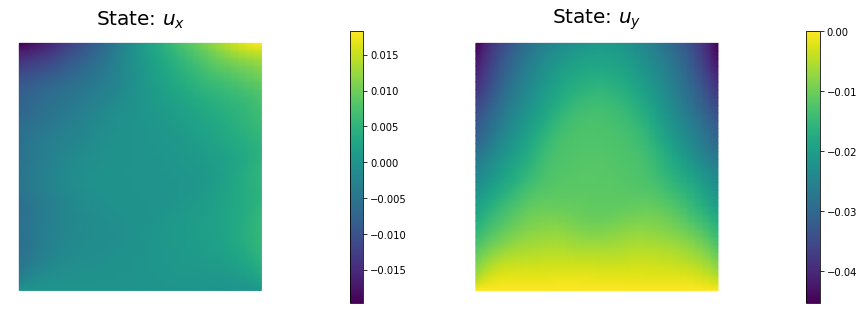

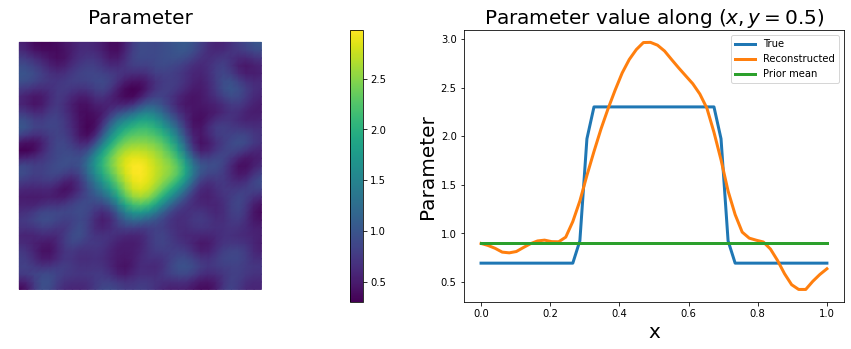

In [8]:
m = prior.mean.copy()
solver = ReducedSpaceNewtonCG(model)
solver.parameters["rel_tolerance"] = 1e-8
solver.parameters["abs_tolerance"] = 1e-12
solver.parameters["max_iter"]      = 100
solver.parameters["GN_iter"] = 5
solver.parameters["globalization"] = "LS"
solver.parameters["LS"]["c_armijo"] = 1e-4
    
x = solver.solve([None, m, None])
    
if solver.converged:
    print( "\nConverged in ", solver.it, " iterations.")
else:
    print( "\nNot Converged")

print( "Termination reason: ", solver.termination_reasons[solver.reason] )
print( "Final gradient norm: ", solver.final_grad_norm )
print( "Final cost: ", solver.final_cost )

def plot_line(obj, lineLoc, legendLabels):
    """
    Currently only works for plotting along x axis.
    Todo: i) Make it so I can just enter x or y location
          ii) Move function to utils
    """
    nobjs = len(obj)
    assert nobjs == len(legendLabels), "Number of functions must match number of legend entries"
 
    for i in range(nobjs):
        assert isinstance(obj[i], dl.Function), "Must be a function"
        
        fvals = np.array([obj[i](loc) for loc in lineLoc])
        plt.plot(lineLoc[:,0], fvals, linewidth=3, label=legendLabels[i])
        
mytitles = ["State: $u_x$", "State: $u_y$"]
pf.plot(dl.Function(Vh[STATE], x[STATE]), mytitles)
plt.figure(figsize=(15,5))
nb.plot(dl.Function(Vh[PARAMETER], x[PARAMETER]), subplot_loc=121,mytitle="Parameter")

plt.subplot(122)
x_coord = np.linspace(0, 1, 50)
lineLoc = np.array([(x_, 0.5) for x_ in x_coord])
objs = [mtrue_fun, dl.Function(Vh[PARAMETER], x[PARAMETER]),
        dl.Function(Vh[PARAMETER], prior.mean)]
legendLabels = ["True", "Reconstructed", "Prior mean"]
plot_line(objs, lineLoc, legendLabels)
plt.xlabel("x", fontsize=20)
plt.ylabel("Parameter", fontsize=20)
plt.title("Parameter value along $(x, y=0.5)$", fontsize=20)
plt.legend()
plt.show()

## 8. Compute the low rank Gaussian approximation of the posterior
We used the *double pass* algorithm to compute a low-rank decomposition of the Hessian Misfit.
In particular, we solve

$$ \matHmis {\bf v}_i = \lambda_i \Gprior^{-1} {\bf v}_i. $$

The Figure shows the largest *k* generalized eigenvectors of the Hessian misfit.
The effective rank of the Hessian misfit is the number of eigenvalues above the red line ($y=1$).
The effective rank is independent of the mesh size.

Double Pass Algorithm. Requested eigenvectors: 50; Oversampling 20.


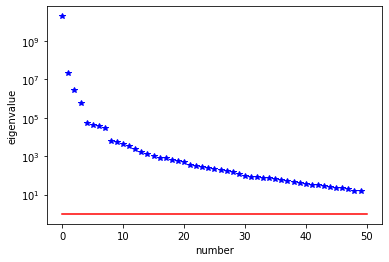

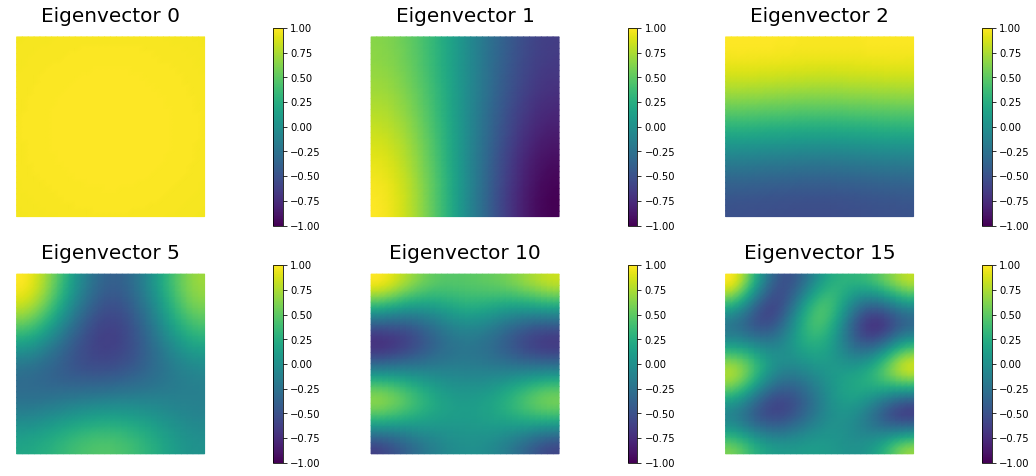

In [9]:
model.setPointForHessianEvaluations(x, gauss_newton_approx=False)
Hmisfit = ReducedHessian(model, misfit_only=True)
k = 50
p = 20
print( "Double Pass Algorithm. Requested eigenvectors: {0}; Oversampling {1}.".format(k,p) )

Omega = MultiVector(x[PARAMETER], k+p)
parRandom.normal(1., Omega)
lmbda, V = doublePassG(Hmisfit, prior.R, prior.Rsolver, Omega, k)

posterior = GaussianLRPosterior(prior, lmbda, V)
posterior.mean = x[PARAMETER]

plt.plot(range(0,k), lmbda, 'b*', range(0,k+1), np.ones(k+1), '-r')
plt.yscale('log')
plt.xlabel('number')
plt.ylabel('eigenvalue')

nb.plot_eigenvectors(Vh[PARAMETER], V, mytitle="Eigenvector", which=[0,1,2,5,10,15])

## 9. Prior and LA-posterior pointwise variance fields

LA-Posterior trace 1.500164e+02; Prior trace 1.204596e+07; Correction trace 1.204581e+07


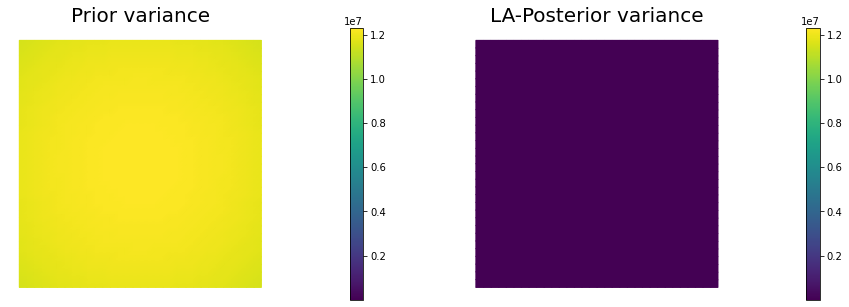

In [10]:
compute_trace = True
if compute_trace:
    post_tr, prior_tr, corr_tr = posterior.trace(method="Randomized", r=200)
    print( "LA-Posterior trace {0:5e}; Prior trace {1:5e}; Correction trace {2:5e}".format(post_tr, prior_tr, corr_tr) )
post_pw_variance, pr_pw_variance, corr_pw_variance = posterior.pointwise_variance(method="Exact")

objs = [dl.Function(Vh[PARAMETER], pr_pw_variance),
        dl.Function(Vh[PARAMETER], post_pw_variance)]
mytitles = ["Prior variance", "LA-Posterior variance"]
nb.multi1_plot(objs, mytitles, logscale=False)
plt.show()

## 10. Generate samples from Prior and LA-Posterior

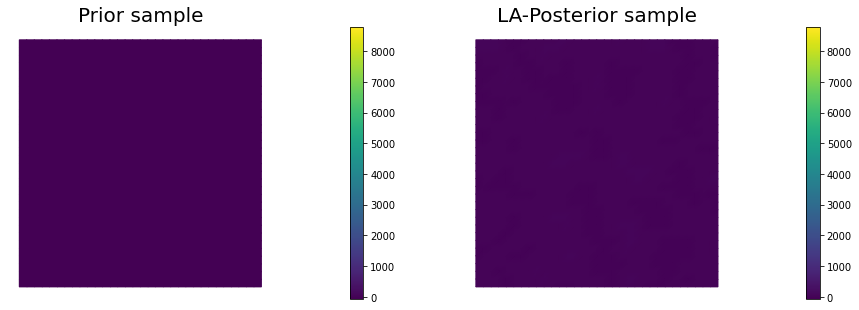

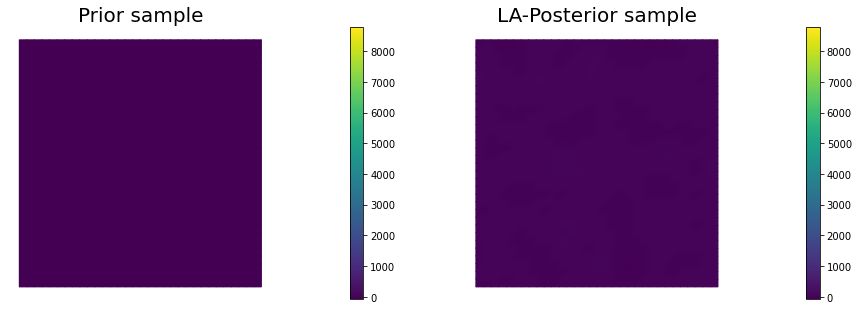

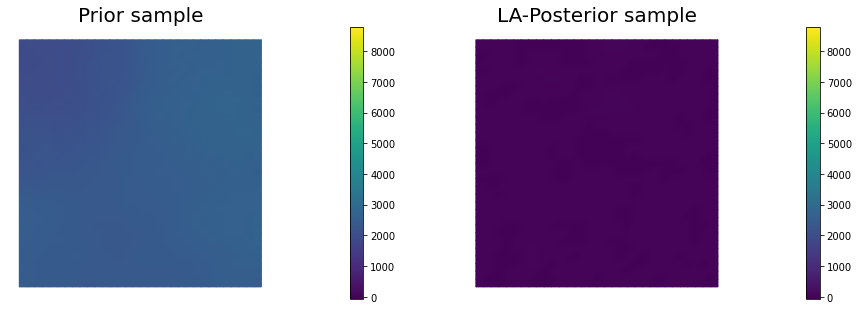

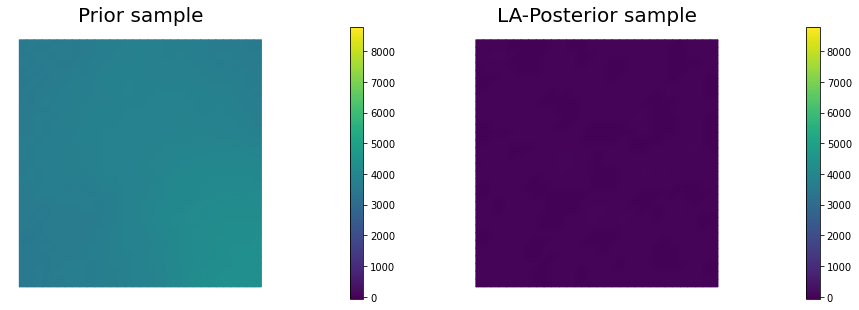

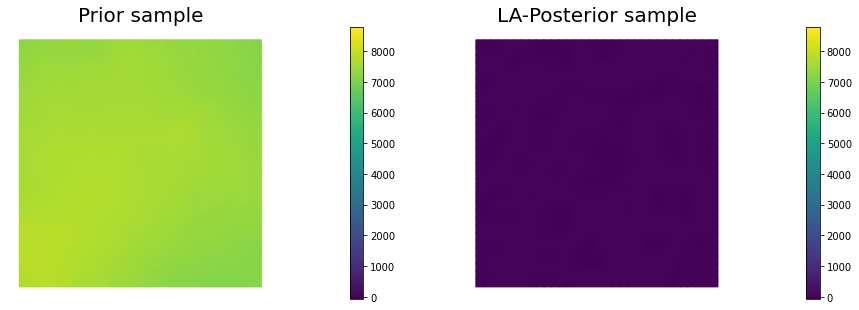

In [11]:
nsamples = 5
noise = dl.Vector()
posterior.init_vector(noise,"noise")
s_prior = dl.Function(Vh[PARAMETER], name="sample_prior")
s_post = dl.Function(Vh[PARAMETER], name="sample_post")

pr_max   =  2.5*math.sqrt( pr_pw_variance.max() ) + prior.mean.max()
pr_min   = -2.5*math.sqrt( pr_pw_variance.max() ) + prior.mean.min()
ps_max   =  2.5*math.sqrt( post_pw_variance.max() ) + posterior.mean.max()
ps_min   = -2.5*math.sqrt( post_pw_variance.max() ) + posterior.mean.min()

vmax = max(pr_max, ps_max)
vmin = max(pr_min, ps_min)

for i in range(nsamples):
    parRandom.normal(1., noise)
    posterior.sample(noise, s_prior.vector(), s_post.vector())
    plt.figure(figsize=(15,5))
    nb.plot(s_prior, subplot_loc=121,mytitle="Prior sample", vmin=vmin, vmax=vmax)
    nb.plot(s_post, subplot_loc=122,mytitle="LA-Posterior sample", vmin=vmin, vmax=vmax)
    plt.show()

## 11. Evaluate true Posterior and LA-Posterior in large and small eigenvector directions

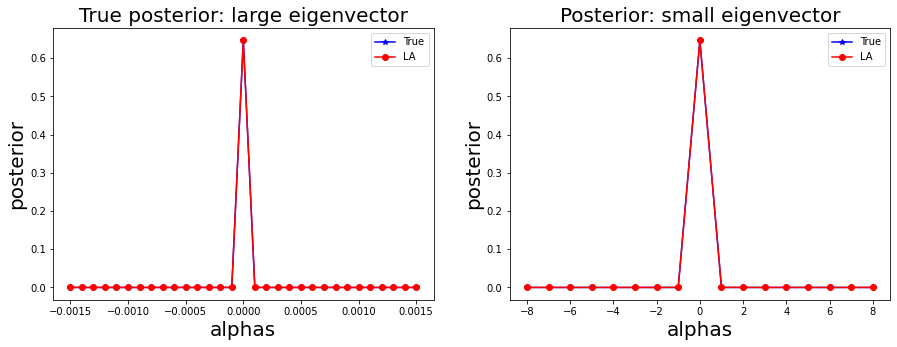

In [12]:
def evaluateTruePosterior(mu, alpha, z):
    x = model.generate_vector()
    x[PARAMETER].axpy(1., mu)
    x[PARAMETER].axpy(alpha, z)
    model.solveFwd(x[STATE], x)
    cx = model.cost(x)
    
    return math.exp(-cx[0])
    
def evaluateLAposterior(mu, alpha, z):
    x = model.generate_vector()
    x[PARAMETER].axpy(1., mu)
    model.solveFwd(x[STATE], x)
    model.solveAdj(x[ADJOINT], x)    
    model.setPointForHessianEvaluations(x, gauss_newton_approx=False)
    H = ReducedHessian(model, misfit_only=False)
    Hm = model.generate_vector(PARAMETER)
    h = model.generate_vector(PARAMETER)
    h = alpha*z
    H.mult(h, Hm)
    pi_m = 0.5*Hm.inner(h)
    
    return math.exp(-pi_m)#*0.3943316

r1 = np.arange(-15,-8)
#r2 = np.linspace(-8,8,49)
r2 = np.linspace(-8,8,17)
r3 = np.arange(9,16)
alphasLE = 1e-4*np.concatenate([r1, r2, r3])
postArrayLE = np.zeros((2, len(alphasLE)))

for count, alpha in enumerate(alphasLE):
    postArrayLE[0, count] = evaluateTruePosterior(x[PARAMETER], alpha, V[0])
    postArrayLE[1, count] = evaluateLAposterior(x[PARAMETER], alpha, V[0])
    
r1 = np.arange(-8,-3)
#r2 = np.linspace(-3,3,31)
r2 = np.linspace(-3,3,7)
r3 = np.arange(4,9)
alphasSE = np.concatenate([r1, r2, r3])
postArraySE = np.zeros((2, len(alphasSE)))

for count, alpha in enumerate(alphasSE):
    postArraySE[0, count] = evaluateTruePosterior(x[PARAMETER], alpha, V[k-1])
    postArraySE[1, count] = evaluateLAposterior(x[PARAMETER], alpha, V[k-1])

#Normalize LA posterior with posterior value for alpha=0
normalizeConst = evaluateTruePosterior(x[PARAMETER], 0, V[k-1])
postArrayLE[1,:] *= normalizeConst
postArraySE[1,:] *= normalizeConst

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(alphasLE, postArrayLE[0,:], 'b*-',label='True')
plt.plot(alphasLE, postArrayLE[1,:], 'ro-',label='LA')
plt.xlabel("alphas", fontsize=20)
plt.ylabel("posterior", fontsize=20)
plt.title("True posterior: large eigenvector", fontsize=20)
plt.legend()

plt.subplot(122)
plt.plot(alphasSE, postArraySE[0,:], 'b*-',label='True')
plt.plot(alphasSE, postArraySE[1,:], 'ro-',label='LA')
plt.xlabel("alphas", fontsize=20)
plt.ylabel("posterior", fontsize=20)
plt.title("Posterior: small eigenvector", fontsize=20)
plt.legend()

Copyright &copy; 2016-2018, The University of Texas at Austin & University of California, Merced.<br>
All Rights reserved.<br>
See file COPYRIGHT for details.

hIPPYlib is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License (as published by the Free Software Foundation) version 2.0 dated June 1991.